In [ ]:
import numpy as np
import os
import shutil
import pandas as pd
from PIL import Image, ImageOps
import IPython.display as display
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rootdir= '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset' #path of the original folder
save_dir='/content/drive/MyDrive/Lung Cancer Files'
classes = ['Normal cases', 'Malignant cases', 'Bengin cases']

In [ ]:
#napravili smo foldere normal cases, bengin cases, malignant cases
for i in classes:

    os.makedirs(save_dir +'/'+ i)
    source = rootdir + '/' + i
    allFileNames = os.listdir(source)
    allFileNames=np.array(allFileNames)
    noviFileNames = [source+'/'+ name for name in allFileNames.tolist()]
    for name in noviFileNames:
      shutil.copy(name, save_dir +'/' + i)


In [ ]:
#data augumentacija benignih, jer ih ima 121 a zelim da ih ima oko 500
#zelimo da imamo ravnomjernu raspodjelu po klasama, trenutno benignih ima 121 a malignih oko 500
import scipy
from scipy import ndimage as nd
i=0
image_path = '/content/drive/MyDrive/Lung Cancer Files/Bengin cases/Bengin case (1).jpg'
#image = plt.imread(image_path)
image = np.expand_dims(plt.imread(image_path), 0)
save_here= save_dir + '/Bengin cases'
source = save_dir+'/Bengin cases'

data = ImageDataGenerator()
#dataset = data.flow_from_directory(source)

dataset1= os.listdir(source)

datagen = ImageDataGenerator(
                              shear_range=0.1,
                              zoom_range=0.2,
                              horizontal_flip=True)
datagen.fit(image)
print(len(dataset1))
for i in range(len(dataset1)):
  iterator = next(iter(dataset1))
  for x, val in zip(datagen.flow(image, #image we chose
          save_to_dir=save_here,     #this is where we figure out where to save
          save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
          save_format='jpg'),range(3)) :
          i+=1
          pass
  print(i)



121
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123


In [ ]:
i=0
image_path = '/content/drive/MyDrive/Lung Cancer Files/Normal cases/Normal case (1).jpg'
#image = plt.imread(image_path)
image = np.expand_dims(plt.imread(image_path), 0)
save_here= save_dir + '/Normal cases'
source = save_dir+'/Normal cases'

data = ImageDataGenerator()
#dataset = data.flow_from_directory(source)

dataset1= os.listdir(source)

datagen = ImageDataGenerator(
                              shear_range=0.1,
                              zoom_range=0.2,
                              horizontal_flip=True)
datagen.fit(image)
print(len(dataset1))

for i in range(80):
  iterator = next(iter(dataset1))
  for x, val in zip(datagen.flow(image, #image we chose
          save_to_dir=save_here,     #this is where we figure out where to save
          save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
          save_format='jpg'),range(2)) :
          i+=1
          pass
  print(i)


415
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81


In [ ]:
i=0
image_path = '/content/drive/MyDrive/Lung Cancer Files/Malignant cases/Malignant case (1).jpg'
#image = plt.imread(image_path)
image = np.expand_dims(plt.imread(image_path), 0)
save_here= save_dir + '/Malignant cases'
source = save_dir+'/Malignant cases'

data = ImageDataGenerator()
#dataset = data.flow_from_directory(source)

dataset1= os.listdir(source)

datagen = ImageDataGenerator(
                              shear_range=0.1,
                              zoom_range=0.2,
                              horizontal_flip=True)
datagen.fit(image)
print(len(dataset1))

for i in range(100):
  iterator = next(iter(dataset1))
  for x, val in zip(datagen.flow(image, #image we chose
          save_to_dir=save_here,     #this is where we figure out where to save
          save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
          save_format='jpg'),range(1)) :
          i+=1
          pass
  print(i)

561
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [ ]:
#originalni folder
for i in classes:
    source = rootdir + '/' + i
    dataset1= os.listdir(source)
    print(len(dataset1))

415
561
121


In [ ]:
#novi folderi
for i in classes:
    source = save_dir + '/' + i
    dataset1= os.listdir(source)
    print(len(dataset1))

649
757
600


Da bi model bio reprezentativan, potrebno je da za svaku klasu imamo bar [1000 ](https://petewarden.com/2017/12/14/how-many-images-do-you-need-to-train-a-neural-network/)slika. Zato sada radimo dodatnu augmentaciju i spremamo te slike

In [ ]:
#data augumentacija benignih, jer ih ima 600 a zelim da ih ima oko 1000
i=0
image_path = '/content/drive/MyDrive/Lung Cancer Files/Bengin cases/Bengin case (1).jpg'
image = np.expand_dims(plt.imread(image_path), 0)
save_here= save_dir + '/Bengin cases'
source = save_dir+'/Bengin cases'

data = ImageDataGenerator()

dataset1= os.listdir(source)
print(len(dataset1))
datagen = ImageDataGenerator(
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True)
datagen.fit(image)
for i in range(len(dataset1)):
  iterator = next(iter(dataset1))
  for x, val in zip(datagen.flow(image, #image we chose
          save_to_dir=save_here,     #this is where we figure out where to save
          save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
          save_format='jpg'),range(1)) :
          i+=1
          print(i)
          pass
print(len(dataset1))

602
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


In [ ]:

image_path = '/content/drive/MyDrive/Lung Cancer Files/Normal cases/Normal case (1).jpg'
#image = plt.imread(image_path)
image = np.expand_dims(plt.imread(image_path), 0)
save_here= save_dir + '/Normal cases'
source = save_dir+'/Normal cases'

data = ImageDataGenerator()
#dataset = data.flow_from_directory(source)

dataset1= os.listdir(source)

datagen = ImageDataGenerator(
                              shear_range=0.1,
                              zoom_range=0.2,
                              horizontal_flip=True)
datagen.fit(image)
for i in range(500):
  iterator = next(iter(dataset1))
  for x, val in zip(datagen.flow(image, #image we chose
          save_to_dir=save_here,     #this is where we figure out where to save
          save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
          save_format='jpg'),range(1)) :
          pass

In [ ]:
i=0
image_path = '/content/drive/MyDrive/Lung Cancer Files/Malignant cases/Malignant case (1).jpg'
image = np.expand_dims(plt.imread(image_path), 0)
save_here= save_dir + '/Malignant cases'
source = save_dir+'/Malignant cases'

data = ImageDataGenerator()
#dataset = data.flow_from_directory(source)

dataset1= os.listdir(source)

datagen = ImageDataGenerator(
                              shear_range=0.1,
                              zoom_range=0.2,
                              horizontal_flip=True)
datagen.fit(image)

for i in range(400):
  iterator = next(iter(dataset1))
  for x, val in zip(datagen.flow(image, #image we chose
          save_to_dir=save_here,     #this is where we figure out where to save
          save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
          save_format='jpg'),range(1)) :
          i+=1
          pass
print(len(dataset1))

757


In [ ]:
sum=0
for i in classes:
    source = save_dir + '/' + i
    dataset1= os.listdir(source)
    print(len(dataset1))
    sum+=len(dataset1)

print(sum)

1577
1510
1692
4779


splitting files into train and test sets

In [ ]:

for i in classes:

    os.makedirs(save_dir +'/train/' + i)
    os.makedirs(save_dir +'/test/' + i)

    source = save_dir + '/' + i

    allFileNames = os.listdir(source)

    np.random.shuffle(allFileNames)

    test_ratio = 0.1

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])

    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
      shutil.copy(name, save_dir +'/train/' + i)

    for name in test_FileNames:
      shutil.copy(name, save_dir +'/test/' + i)

In [ ]:
trening=image_dataset_from_directory(
    save_dir + '/train/',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=2,
    validation_split=0.1,
    subset='both'
)

test_dataset = image_dataset_from_directory(
    save_dir + "/test/",
    image_size=(256,256),
    batch_size=32)

Found 4299 files belonging to 3 classes.
Using 3870 files for training.
Using 429 files for validation.
Found 479 files belonging to 3 classes.


In [ ]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomZoom(0.1),
 ]
)

<ipython-input-29-3650123a8d9f>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 3, i + 1)


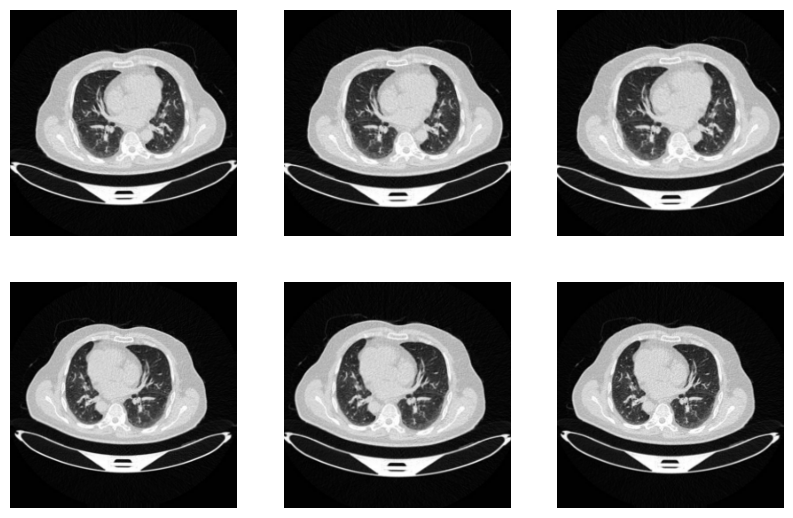

In [ ]:
plt.figure(figsize=(10,10))
for images, _ in trening[0].take(1): #uzima samo jednu sliku i radi data augumentation na nju
  plt.imshow(images[0].numpy().astype("uint8"))
  for i in range(6):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Prvi model koristi slike u boji veličine (256,256), 4 konvolucijska i 4 Maxpooling sloja, te augmentaciju. Treniramo ga na 20 epoha. Na test skupu (koji sadrzi 479 slika) dobijamo tačnost od 98.96% sa 5 pogrešno klasificiranih slika.

In [ ]:
inputs = keras.Input(shape=(256,256, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                           

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="vol2_model1.keras",
 save_best_only=True,
 monitor="val_loss")
]
history = model.fit(
 trening[0],
 validation_data=trening[1],
 epochs=20,
 callbacks=callbacks)

Epoch 1/20
121/121 [==============================] - 23s 165ms/step - loss: 0.4545 - accuracy: 0.8251 - val_loss: 0.1877 - val_accuracy: 0.9324
Epoch 2/20
121/121 [==============================] - 21s 161ms/step - loss: 0.1996 - accuracy: 0.9238 - val_loss: 0.1440 - val_accuracy: 0.9417
Epoch 3/20
121/121 [==============================] - 24s 188ms/step - loss: 0.1665 - accuracy: 0.9364 - val_loss: 0.0967 - val_accuracy: 0.9487
Epoch 4/20
121/121 [==============================] - 19s 150ms/step - loss: 0.1657 - accuracy: 0.9444 - val_loss: 0.0942 - val_accuracy: 0.9650
Epoch 5/20
121/121 [==============================] - 22s 173ms/step - loss: 0.1126 - accuracy: 0.9574 - val_loss: 0.1157 - val_accuracy: 0.9487
Epoch 6/20
121/121 [==============================] - 21s 157ms/step - loss: 0.1033 - accuracy: 0.9615 - val_loss: 0.0806 - val_accuracy: 0.9604
Epoch 7/20
121/121 [==============================] - 21s 163ms/step - loss: 0.0882 - accuracy: 0.9674 - val_loss: 0.0603 - val_ac

In [ ]:
test_model = keras.models.load_model("vol2_model1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}", f"Test loss: {test_loss:.3f}" )

15/15 [==============================] - 3s 122ms/step - loss: 0.0276 - accuracy: 0.9896
Test accuracy: 0.990 Test loss: 0.028


In [ ]:
test_model = keras.models.load_model("vol2_model1.keras")

slike=[]
matrica=[]
t_labels=[]
for file, labels in test_dataset:
  result=test_model.predict(file)
  matrica.append(result)
  t_labels.append(labels.numpy())
  slike.append(file)

t_labels=np.concatenate(t_labels, axis=None)

matrica1=np.concatenate(matrica, axis=0)
slike1=np.concatenate(slike, axis=None)
predikcije1=[]

for i in range(len(matrica1)):
  j=pd.Series(matrica1[i]).idxmax()
  predikcije1.append(j)


print(predikcije1)
print(t_labels)

1/1 [==============================] - 0s 90ms/step
[2, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2,

[[169   0   1]
 [  0 150   1]
 [  1   2 155]]


0.9895615866388309

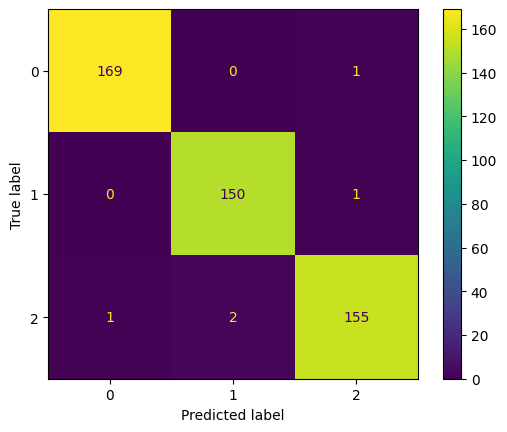

In [ ]:
cm = confusion_matrix(t_labels,predikcije1) #trebalo bi y_pred umjesto nova, da sam ih pretvorila u vr 0 ili 1 al nisam so its ok
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()

accuracy_score(t_labels, predikcije1)

98
Predikcija:  Bengin cases Stvarna vrijednost:  Normal cases
j: 3 2
251
Predikcija:  Malignant cases Stvarna vrijednost:  Bengin cases
j: 7 27
262
Predikcija:  Malignant cases Stvarna vrijednost:  Bengin cases
j: 8 6
278
Predikcija:  Bengin cases Stvarna vrijednost:  Malignant cases
j: 8 22
438
Predikcija:  Normal cases Stvarna vrijednost:  Bengin cases
j: 13 22


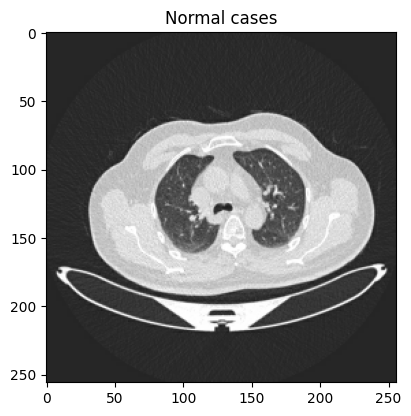

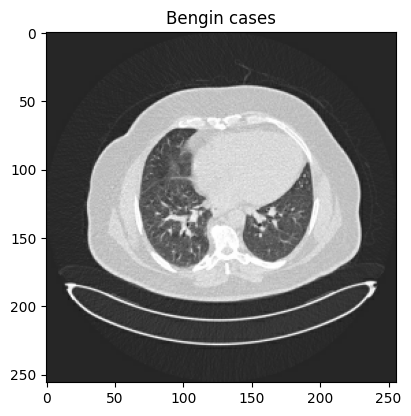

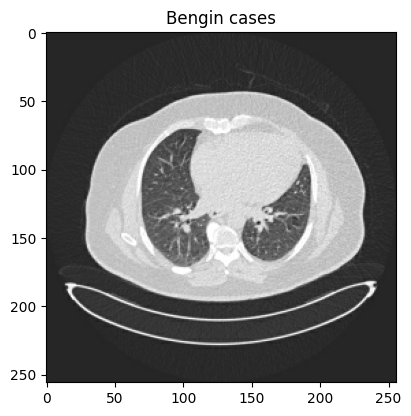

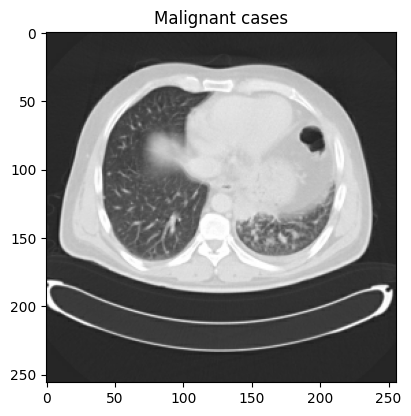

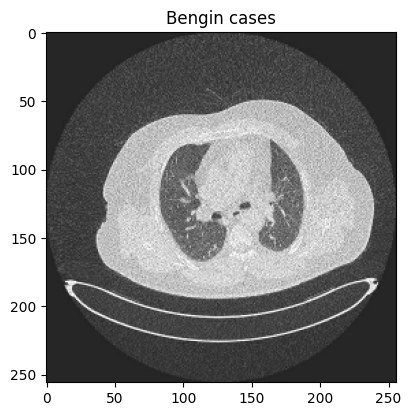

In [ ]:
for i in range(len(predikcije1)):
  if predikcije1[i]!=t_labels[i]:
    print(i)
    print("Predikcija: ", classes[predikcije1[i]], "Stvarna vrijednost: ", classes[t_labels[i]])
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(2,2,2)
    j=i//32
    k=i-32*j
    print("j:",j,k)
    plt.imshow(slike[j][k].numpy().astype("uint8"))
    label = t_labels[i]
    plt.title(classes[label])

Model 2 u odnosu na model 1 ima dodatni konvolucijski sloj i maxpooling sloj. Ovo nam pomaže da bolje ekstraktujemo high-level features. On griješi u samo 3 slike i ima tačnost 99.37% na test skupu.

In [ ]:
inputs = keras.Input(shape=(256,256, 3))
x = data_augmentation (inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
#x = layers.Dropout(0.3)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                           

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="vol2_model2.keras",
 save_best_only=True,
 monitor="val_loss")
]
history = model.fit(
 trening[0],
 validation_data=trening[1],
 epochs=20,
 callbacks=callbacks)

Epoch 1/20
121/121 [==============================] - 21s 156ms/step - loss: 0.4785 - accuracy: 0.7884 - val_loss: 0.1710 - val_accuracy: 0.9277
Epoch 2/20
121/121 [==============================] - 20s 158ms/step - loss: 0.2019 - accuracy: 0.9214 - val_loss: 0.1376 - val_accuracy: 0.9441
Epoch 3/20
121/121 [==============================] - 20s 150ms/step - loss: 0.1626 - accuracy: 0.9367 - val_loss: 0.1312 - val_accuracy: 0.9417
Epoch 4/20
121/121 [==============================] - 22s 174ms/step - loss: 0.1518 - accuracy: 0.9426 - val_loss: 0.1211 - val_accuracy: 0.9510
Epoch 5/20
121/121 [==============================] - 19s 151ms/step - loss: 0.1339 - accuracy: 0.9545 - val_loss: 0.0766 - val_accuracy: 0.9557
Epoch 6/20
121/121 [==============================] - 21s 165ms/step - loss: 0.1064 - accuracy: 0.9597 - val_loss: 0.0811 - val_accuracy: 0.9720
Epoch 7/20
121/121 [==============================] - 21s 163ms/step - loss: 0.0921 - accuracy: 0.9646 - val_loss: 0.0985 - val_ac

In [ ]:
test_model = keras.models.load_model("vol2_model2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}", f"Test loss: {test_loss:.3f}" )

15/15 [==============================] - 2s 77ms/step - loss: 0.0160 - accuracy: 0.9937
Test accuracy: 0.994 Test loss: 0.016


In [ ]:
test_model = keras.models.load_model("vol2_model2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

slike=[]
matrica=[]
t_labels=[]
for file, labels in test_dataset:
  result=test_model.predict(file)
  matrica.append(result)
  t_labels.append(labels.numpy())
  slike.append(file)

t_labels=np.concatenate(t_labels, axis=None)

matrica1=np.concatenate(matrica, axis=0)
slike1=np.concatenate(slike, axis=None)
predikcije1=[] #predikcije

for i in range(len(matrica1)):
  j=pd.Series(matrica1[i]).idxmax()
  predikcije1.append(j)


15/15 [==============================] - 4s 94ms/step - loss: 0.0160 - accuracy: 0.9937
Test accuracy: 0.994
1/1 [==============================] - 0s 93ms/step


[[168   0   2]
 [  0 151   0]
 [  0   1 157]]


0.9937369519832986

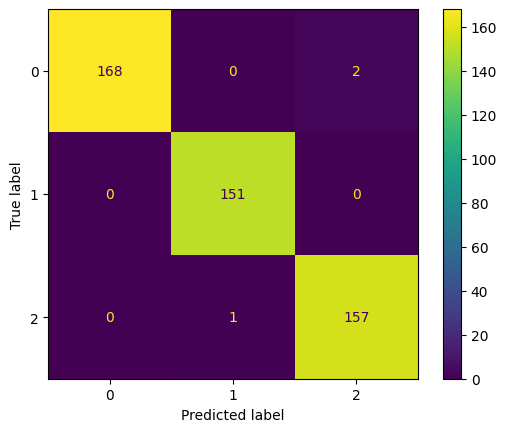

In [ ]:
cm = confusion_matrix(t_labels,predikcije1) #trebalo bi y_pred umjesto nova, da sam ih pretvorila u vr 0 ili 1 al nisam so its ok
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()

accuracy_score(t_labels, predikcije1)

94
Predikcija:  Bengin cases Stvarna vrijednost:  Normal cases
j: 2 30
311
Predikcija:  Malignant cases Stvarna vrijednost:  Bengin cases
j: 9 23
464
Predikcija:  Bengin cases Stvarna vrijednost:  Normal cases
j: 14 16


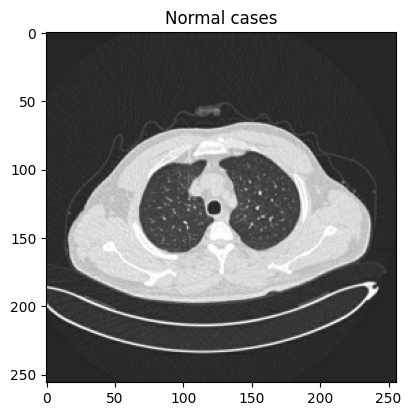

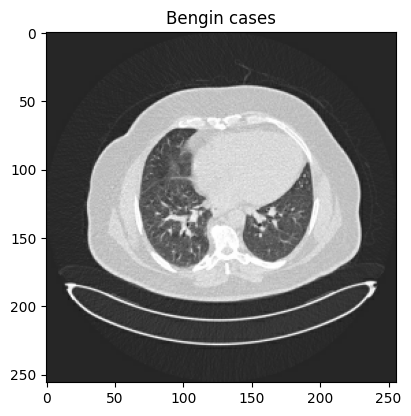

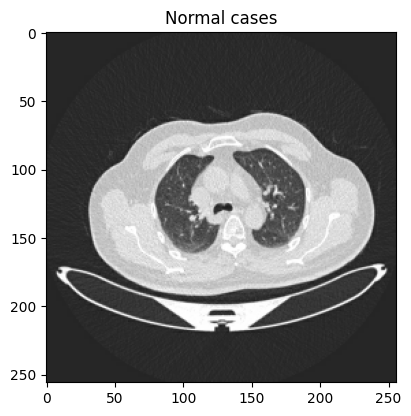

In [ ]:
for i in range(len(predikcije1)):
  if predikcije1[i]!=t_labels[i]:
    print(i)
    print("Predikcija: ", classes[predikcije1[i]], "Stvarna vrijednost: ", classes[t_labels[i]])
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(2,2,2)
    j=i//32
    k=i-32*j
    print("j:",j,k)
    plt.imshow(slike[j][k].numpy().astype("uint8"))
    label = t_labels[i]
    plt.title(classes[label])


Radimo sada sa sivoskaliranim slikama veličine (512,512)


In [ ]:

trening_sivi=image_dataset_from_directory(
    save_dir + '/train/',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(512,512),
    shuffle=True,
    seed=2,
    validation_split=0.1,
    subset='both'
)

test_sivi = image_dataset_from_directory(
    save_dir + "/test/",
    image_size=(512,512),
    color_mode='grayscale',
    batch_size=32)


Found 4299 files belonging to 3 classes.
Using 3870 files for training.
Using 429 files for validation.
Found 479 files belonging to 3 classes.


In [ ]:
for image_batch, labels_batch in trening_sivi[0]:
  print(image_batch.shape)
  break

(32, 512, 512, 1)


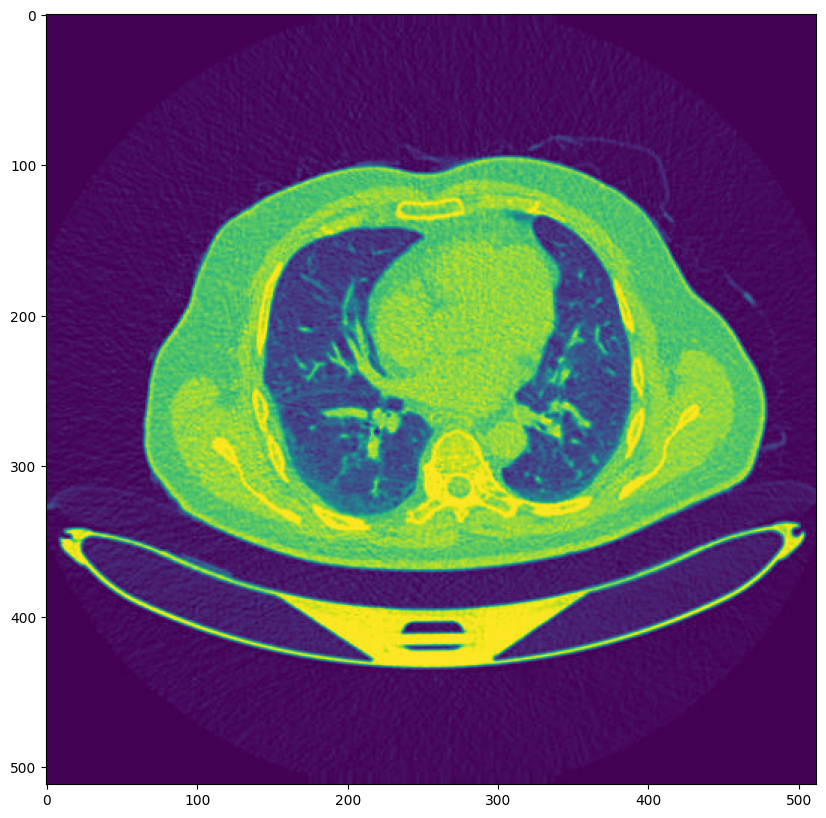

In [ ]:
plt.figure(figsize=(10,10))
for images, _ in trening_sivi[0].take(1): #uzima samo jednu sliku i radi data augumentation na nju
  plt.imshow(images[0].numpy().astype("uint8"))


In [ ]:
data_augmentation1=keras.Sequential([
    layers.RandomFlip("horizontal"),
 layers.RandomZoom(0.25)]
)

<ipython-input-65-c11250cae019>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 3, i + 1)


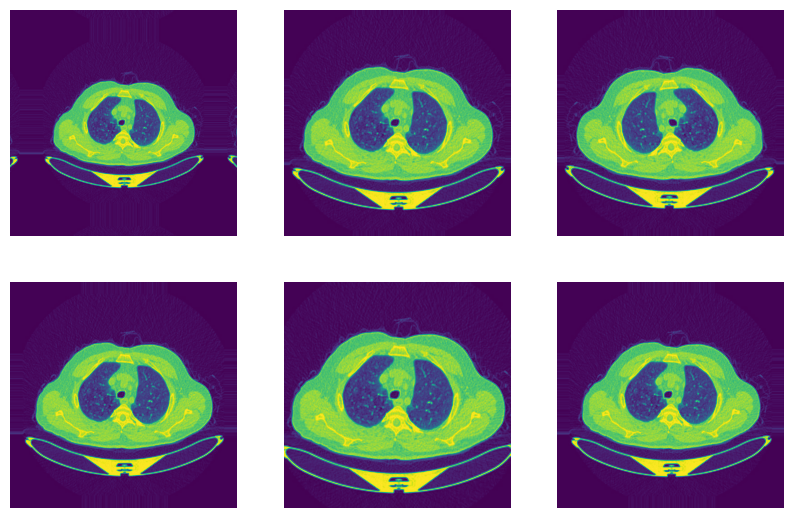

In [ ]:
i=0
plt.figure(figsize=(10,10))
for images, _ in trening_sivi[0].take(1): #uzima samo jednu sliku i radi data augumentation na nju
  plt.imshow(images[0].numpy().astype("uint8"))
  for i in range(6):
    augmented_images =data_augmentation1(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Treći model ima tačnost od 97.9% na tesnom skupu. Iako koristimo bolju rezoluciju slika, vidimo da boja itekako utiče na rezultat i da je model bolji kada su slike dimenzija 256x256, ali u originalnoj boji (3 kanala), nego kada su većih dimenzija, ali im oduzmemo reprezentaciju boje preko 3 kanala i damo samo 1 kanal.

In [ ]:
inputs = keras.Input(shape=(512,512,1))
x = data_augmentation1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
outputs = layers.Dense(3, activation="softmax")(x)
model3= keras.Model(inputs=inputs, outputs=outputs)
model3.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 512, 512, 1)]     0         
                                                                 
 sequential_4 (Sequential)   (None, 512, 512, 1)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 512, 512, 1)       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 510, 510, 32)      320       
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 255, 255, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 253, 253, 64)      18496     
                                                           

In [ ]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="vol2_model3.keras",
 save_best_only=True,
 monitor="val_loss")
]
history = model3.fit(
 trening_sivi[0],
 validation_data=trening_sivi[1],
 epochs=20,
 callbacks=callbacks)

Epoch 1/20
121/121 [==============================] - 56s 362ms/step - loss: 0.6948 - accuracy: 0.6894 - val_loss: 0.2304 - val_accuracy: 0.9114
Epoch 2/20
121/121 [==============================] - 34s 269ms/step - loss: 0.2515 - accuracy: 0.9026 - val_loss: 0.1863 - val_accuracy: 0.9371
Epoch 3/20
121/121 [==============================] - 34s 269ms/step - loss: 0.2023 - accuracy: 0.9155 - val_loss: 0.1611 - val_accuracy: 0.9207
Epoch 4/20
121/121 [==============================] - 34s 270ms/step - loss: 0.1846 - accuracy: 0.9264 - val_loss: 0.2243 - val_accuracy: 0.9184
Epoch 5/20
121/121 [==============================] - 34s 277ms/step - loss: 0.1651 - accuracy: 0.9388 - val_loss: 0.1559 - val_accuracy: 0.9510
Epoch 6/20
121/121 [==============================] - 34s 276ms/step - loss: 0.1550 - accuracy: 0.9424 - val_loss: 0.1474 - val_accuracy: 0.9347
Epoch 7/20
121/121 [==============================] - 34s 272ms/step - loss: 0.1461 - accuracy: 0.9470 - val_loss: 0.1127 - val_ac

In [ ]:
test_model = keras.models.load_model("vol2_model3.keras")
test_loss, test_acc = test_model.evaluate(test_sivi)
print(f"Test accuracy: {test_acc:.3f}", f"Test loss: {test_loss:.3f}" )

15/15 [==============================] - 6s 329ms/step - loss: 0.0575 - accuracy: 0.9791
Test accuracy: 0.979 Test loss: 0.058


In [ ]:
test_model = keras.models.load_model("vol2_model3.keras")


slike=[]
matrica=[]
t_labels=[]
for file, labels in test_sivi:
  result=test_model.predict(file)
  matrica.append(result)
  t_labels.append(labels.numpy())
  slike.append(file)

t_labels=np.concatenate(t_labels, axis=None)

matrica1=np.concatenate(matrica, axis=0)
slike1=np.concatenate(slike, axis=None)
predikcije1=[] #predikcije

for i in range(len(matrica1)):
  j=pd.Series(matrica1[i]).idxmax()
  predikcije1.append(j)

1/1 [==============================] - 0s 102ms/step


[[165   0   5]
 [  0 149   2]
 [  1   2 155]]


0.9791231732776617

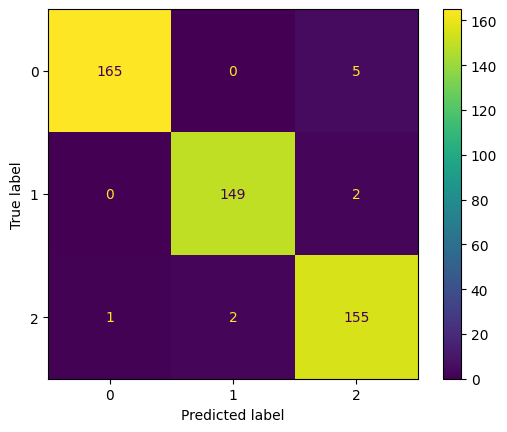

In [ ]:
cm = confusion_matrix(t_labels,predikcije1) #trebalo bi y_pred umjesto nova, da sam ih pretvorila u vr 0 ili 1 al nisam so its ok
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()

accuracy_score(t_labels, predikcije1)

In [ ]:
trening_sivi=image_dataset_from_directory(
    save_dir + '/train/',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=2,
    validation_split=0.1,
    subset='both'
)

test_sivi = image_dataset_from_directory(
    save_dir + "/test/",
    image_size=(256,256),
    color_mode='grayscale',
    batch_size=32)

Found 4299 files belonging to 3 classes.
Using 3870 files for training.
Using 429 files for validation.
Found 479 files belonging to 3 classes.


<ipython-input-92-c11250cae019>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 3, i + 1)


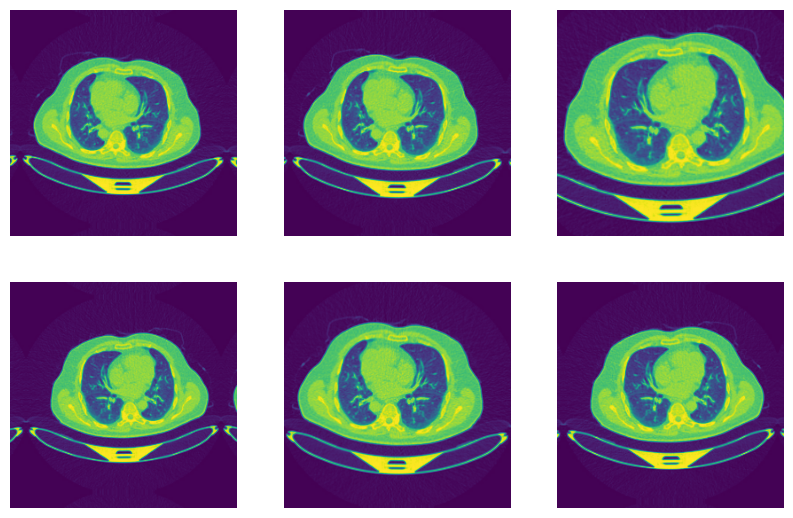

In [ ]:
i=0
plt.figure(figsize=(10,10))
for images, _ in trening_sivi[0].take(1): #uzima samo jednu sliku i radi data augumentation na nju
  plt.imshow(images[0].numpy().astype("uint8"))
  for i in range(6):
    augmented_images =data_augmentation1(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Ovaj model uzima slike (256,256) i sivoskalirane. Očekivano, on ima lošije rezultate. Griješi u čak 13 slika (od 479).

In [ ]:
inputs = keras.Input(shape=(256,256,1))
x = data_augmentation1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
outputs = layers.Dense(3, activation="softmax")(x)
model4= keras.Model(inputs=inputs, outputs=outputs)
model4.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 256, 256, 1)]     0         
                                                                 
 sequential_4 (Sequential)   (None, None, None, 1)     0         
                                                                 
 rescaling_9 (Rescaling)     (None, 256, 256, 1)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 125, 125, 64)      18496     
                                                           

In [ ]:
model4.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="vol2_model4.keras",
 save_best_only=True,
 monitor="val_loss")
]
history = model4.fit(
 trening_sivi[0],
 validation_data=trening_sivi[1],
 epochs=20,
 callbacks=callbacks)

Epoch 1/20
121/121 [==============================] - 24s 150ms/step - loss: 0.4701 - accuracy: 0.7948 - val_loss: 0.1918 - val_accuracy: 0.9254
Epoch 2/20
121/121 [==============================] - 18s 137ms/step - loss: 0.2156 - accuracy: 0.9109 - val_loss: 0.3396 - val_accuracy: 0.8811
Epoch 3/20
121/121 [==============================] - 17s 132ms/step - loss: 0.1975 - accuracy: 0.9214 - val_loss: 0.1539 - val_accuracy: 0.9394
Epoch 4/20
121/121 [==============================] - 18s 139ms/step - loss: 0.1691 - accuracy: 0.9326 - val_loss: 0.1854 - val_accuracy: 0.9161
Epoch 5/20
121/121 [==============================] - 17s 132ms/step - loss: 0.1586 - accuracy: 0.9419 - val_loss: 0.1319 - val_accuracy: 0.9417
Epoch 6/20
121/121 [==============================] - 20s 159ms/step - loss: 0.1331 - accuracy: 0.9494 - val_loss: 0.1152 - val_accuracy: 0.9487
Epoch 7/20
121/121 [==============================] - 18s 136ms/step - loss: 0.1275 - accuracy: 0.9525 - val_loss: 0.1492 - val_ac

In [ ]:
test_model=keras.models.load_model("vol2_model4.keras")
test_loss, test_accuracy= test_model.evaluate(test_sivi)
print(f"Test accuracy: {test_accuracy:.3f}", f"Test loss: {test_loss:.3f}" )

15/15 [==============================] - 3s 96ms/step - loss: 0.0683 - accuracy: 0.9729
Test accuracy: 0.973 Test loss: 0.068


In [ ]:
slike=[]
matrica=[]
t_labels=[]
for file, labels in test_sivi:
  result=test_model.predict(file)
  matrica.append(result)
  t_labels.append(labels.numpy())
  slike.append(file)

t_labels=np.concatenate(t_labels, axis=None)

matrica1=np.concatenate(matrica, axis=0)
slike1=np.concatenate(slike, axis=None)
predikcije1=[] #predikcije

for i in range(len(matrica1)):
  j=pd.Series(matrica1[i]).idxmax()
  predikcije1.append(j)

1/1 [==============================] - 0s 137ms/step


[[165   0   5]
 [  0 147   4]
 [  1   3 154]]


0.9728601252609603

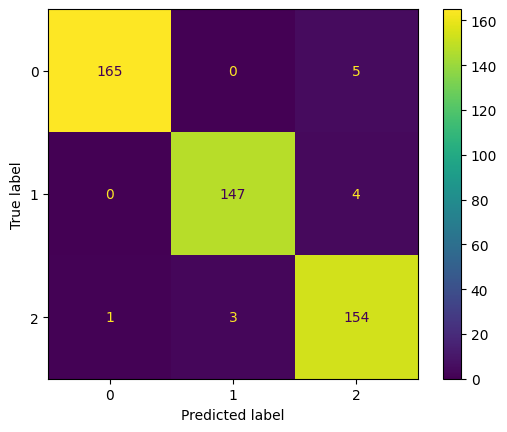

In [ ]:
cm = confusion_matrix(t_labels,predikcije1) #trebalo bi y_pred umjesto nova, da sam ih pretvorila u vr 0 ili 1 al nisam so its ok
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()

accuracy_score(t_labels, predikcije1)

Poređenje modela:


Zaključak je da najbolje uči mreža koja ima 5 konvolucijskih slojeva (broj filtera: 32, 64, 128, 256, 256) i koja prima kao inpute slike u boji (sa 3 kanala) resizeane na velicinu (256,256) - duplo manje od originalnih (512,512). Accuracy tog modela (2) je 99.37%. (Model 2)


---

Model 1 je uzimao iste inpute, ali bez posljednjeg konvolucijskog sloja i njegova tačnost na test skupu je 98.96%
Tu smo radili sa originalnim slikama u smislu boje, dok smo u modelima 3 i 4 radili sa sivoskaliranim slikama.

---


Model 3 je imao slike u originalnim dimenzijama i na testnom skupu je postigao tacnost od 97.91 %. Kod njega smo ostavili isti broj konvolucijskih i pooling slojeva, ali smo uklonili 3 kanala boje i zamijenili ih sa jednim.


---


Na kraju smo testirali model 4 sa sivoskaliranim slikama dimenzija (256,256) i dobili tačnost 97.28%. Manju od prethodne, što je bilo za očekivati, ali vidimo da nije znatna razlika.


---


Dakle, uredu je koristiti resized images (256,256) i bolje je koristiti više konvolucijskih slojeva (za features extraction), te slike u boji. Na svakom od ovih smo na početku koristili i sloj augmentacije, da slika u svakoj epohi izgleda drugačije.




Sada cemo iskoristiti istreniranu mrezu VGG16 za klasifikaciju


In [ ]:
conv_base = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False,
 input_shape=(256,256, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
 conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
#ekstrakcija feature-a

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)


In [ ]:
train_dataset=trening[0]
validation_dataset= trening[1]
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 37ms/step


In [ ]:
test_features.shape

(479, 8, 8, 512)

In [ ]:
test_labels.shape

(479,)

In [ ]:
#classifier
inputs = keras.Input(shape=(8,8, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 8, 8, 512)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 3)                 771       
                                                                 
Total params: 8389635 (32.00 MB)
Trainable params: 8389635 (32.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="model_sa_vgg16.keras",
 save_best_only=True,
 monitor="val_loss")
]
history = model.fit(
 train_features, train_labels,
 epochs=20,
 validation_data=(val_features, val_labels),
 callbacks=callbacks)

Epoch 1/20
121/121 [==============================] - 2s 11ms/step - loss: 26.8624 - accuracy: 0.9401 - val_loss: 4.7300 - val_accuracy: 0.9767
Epoch 2/20
121/121 [==============================] - 1s 9ms/step - loss: 8.8245 - accuracy: 0.9767 - val_loss: 2.8720 - val_accuracy: 0.9907
Epoch 3/20
121/121 [==============================] - 1s 7ms/step - loss: 4.6317 - accuracy: 0.9855 - val_loss: 3.6634 - val_accuracy: 0.9883
Epoch 4/20
121/121 [==============================] - 1s 9ms/step - loss: 4.8405 - accuracy: 0.9876 - val_loss: 1.2381 - val_accuracy: 0.9977
Epoch 5/20
121/121 [==============================] - 1s 7ms/step - loss: 2.5872 - accuracy: 0.9922 - val_loss: 6.8081 - val_accuracy: 0.9814
Epoch 6/20
121/121 [==============================] - 1s 9ms/step - loss: 3.0730 - accuracy: 0.9904 - val_loss: 1.0869 - val_accuracy: 0.9953
Epoch 7/20
121/121 [==============================] - 1s 7ms/step - loss: 1.3773 - accuracy: 0.9956 - val_loss: 3.7747 - val_accuracy: 0.9883
Epoc

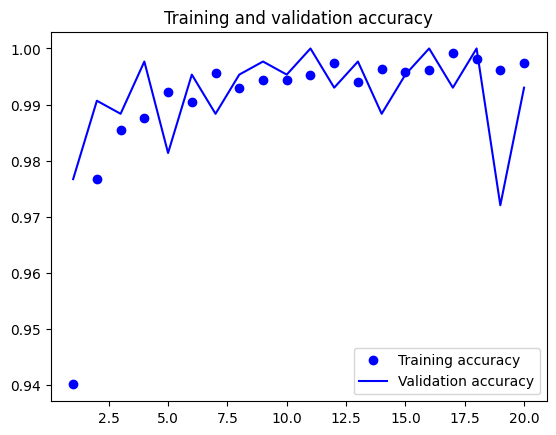

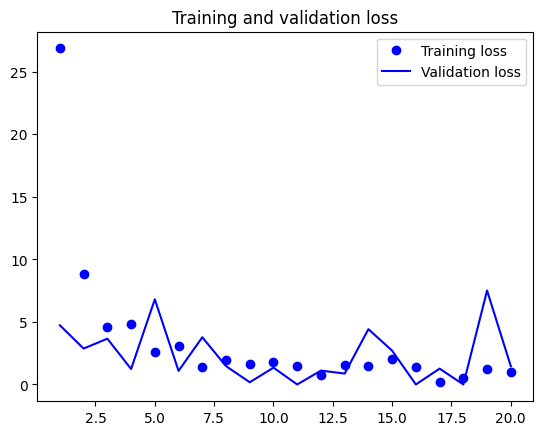

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model=keras.models.load_model("model_sa_vgg16.keras")

In [ ]:
predikcije0=test_model.predict(test_features)

15/15 [==============================] - 0s 4ms/step


In [ ]:
print(len(predikcije0))

479


In [ ]:

#sad imamo test features i test labels
#predict smo vec test features i to su nam predikcije0

predikcije1=[]

for i in range(len(predikcije0)):
  j=pd.Series(predikcije0[i]).idxmax()
  predikcije1.append(j)


print(predikcije1)
print(test_labels)

[2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 

In [ ]:
for i in range(len(predikcije1)):
  if predikcije1[i]!=test_labels[i]:
    print(i, predikcije1[i], test_labels[i])

291 0 2


In [ ]:
1-1/479 #test_accuracy

0.9979123173277662

[[170   0   0]
 [  0 151   0]
 [  1   0 157]]


0.9979123173277662

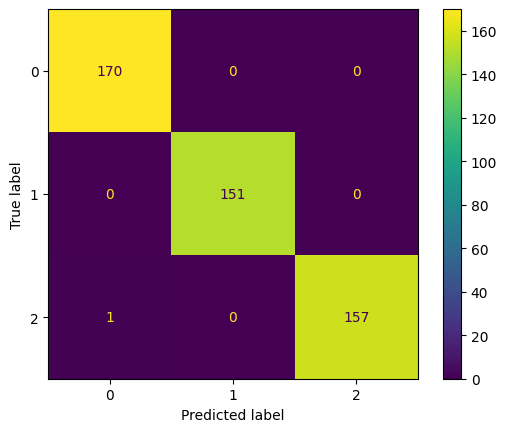

In [ ]:
cm = confusion_matrix(test_labels,predikcije1) #trebalo bi y_pred umjesto nova, da sam ih pretvorila u vr 0 ili 1 al nisam so its ok
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()
accuracy_score(test_labels, predikcije1)

Ovaj model je jednom provukao sve slike (train, test i val) kroz VGG16 mrežu, spasio feature mape i na kraju još provukao kroz dense sloj. Nismo koristili data augmentaciju u treniranju, tj u svakoj epohi svaka slika je ulazila u svom originalnom izgledu. Dobili smo accuracy od 99.79 na test skupu tj samo 1 sliku je pogrešno klasificirao, i to iz benignih u normalne slučajeve, što nam je prihvatljivo.

---

Sada ćemo trenirati VGG16 mrežu u svakoj epohi, jer ovog puta želimo da uradimo data augmentaciju, tj da svaka slika u svaku epohu ulazi drugačija. To će pomoći da model bolje generalizuje, tj da se ne overfita.


In [ ]:
conv_base2 = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False)
conv_base2.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),#rotaciju smo izbacili svaki put jer pretpostavljamo da se CT aparat svaki put postavlja na isti način i da je slika uvijk ispravno okrenuta
 layers.RandomZoom(0.2), #također, to ima veze sa slikama iz našeg dataseta. Naime svaka slika ima u donjem dijelu jedan polukrug (od aparata),
                          #pa ne želimo da ga stavimo u drugi ugao, da ne bi mreža učila nešto što ne želimo
 ]
)
inputs = keras.Input(shape=(256,256, 3))
x = data_augmentation(inputs)
x = keras.layers.Lambda(
     lambda x: keras.applications.vgg16.preprocess_input(x))(x) #nije moglo bez Lambda layera jer se onako nije moglo "serialize"
x = conv_base2(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 lambda (Lambda)             (None, 256, 256, 3)       0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0   

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="model_sa_vgg16_i_data_augmentation.keras",
 save_best_only=True,
 monitor="val_loss")
]
history = model.fit(
 trening[0],
 epochs=20,
 validation_data=trening[1],
 callbacks=callbacks)

Epoch 1/20
121/121 [==============================] - 25s 187ms/step - loss: 40.8195 - accuracy: 0.9289 - val_loss: 14.9907 - val_accuracy: 0.9674
Epoch 2/20
121/121 [==============================] - 24s 191ms/step - loss: 12.2267 - accuracy: 0.9607 - val_loss: 4.7722 - val_accuracy: 0.9860
Epoch 3/20
121/121 [==============================] - 24s 185ms/step - loss: 7.6224 - accuracy: 0.9713 - val_loss: 15.9094 - val_accuracy: 0.9697
Epoch 4/20
121/121 [==============================] - 24s 189ms/step - loss: 8.3698 - accuracy: 0.9765 - val_loss: 15.2483 - val_accuracy: 0.9720
Epoch 5/20
121/121 [==============================] - 24s 191ms/step - loss: 5.0045 - accuracy: 0.9811 - val_loss: 4.3460 - val_accuracy: 0.9883
Epoch 6/20
121/121 [==============================] - 25s 194ms/step - loss: 5.0651 - accuracy: 0.9817 - val_loss: 2.7855 - val_accuracy: 0.9883
Epoch 7/20
121/121 [==============================] - 25s 196ms/step - loss: 4.3559 - accuracy: 0.9817 - val_loss: 1.6035 - v

In [ ]:
test_model = keras.models.load_model(
 "model_sa_vgg16_i_data_augmentation.keras",
 safe_mode=False)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

15/15 [==============================] - 4s 148ms/step - loss: 2.5407 - accuracy: 0.9916
Test accuracy: 0.992


In [ ]:
slike=[]
matrica=[]
t_labels=[]
for file, labels in test_dataset:
  result=test_model.predict(file)
  matrica.append(result)
  t_labels.append(labels.numpy())
  slike.append(file)

t_labels=np.concatenate(t_labels, axis=None)

matrica1=np.concatenate(matrica, axis=0)
slike1=np.concatenate(slike, axis=None)
predikcije1=[] #predikcije

for i in range(len(matrica1)):
  j=pd.Series(matrica1[i]).idxmax()
  predikcije1.append(j)

1/1 [==============================] - 0s 255ms/step


[[169   0   1]
 [  0 151   0]
 [  3   0 155]]


0.9916492693110647

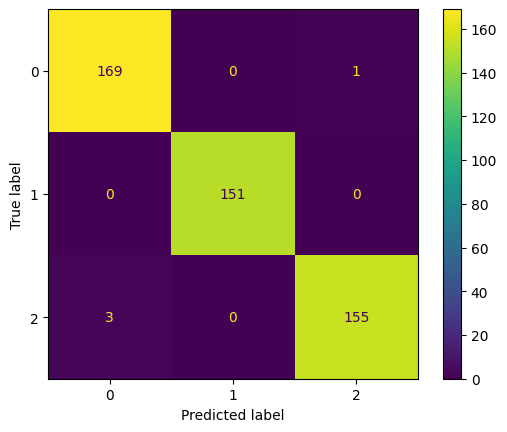

In [ ]:
cm = confusion_matrix(t_labels,predikcije1) #trebalo bi y_pred umjesto nova, da sam ih pretvorila u vr 0 ili 1 al nisam so its ok
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()
accuracy_score(t_labels, predikcije1)

8
Predikcija:  Normal cases Stvarna vrijednost:  Bengin cases
j: 0 8
12
Predikcija:  Bengin cases Stvarna vrijednost:  Normal cases
j: 0 12
19
Predikcija:  Normal cases Stvarna vrijednost:  Bengin cases
j: 0 19
203
Predikcija:  Normal cases Stvarna vrijednost:  Bengin cases
j: 6 11


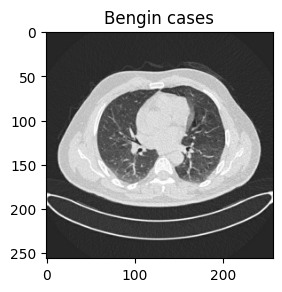

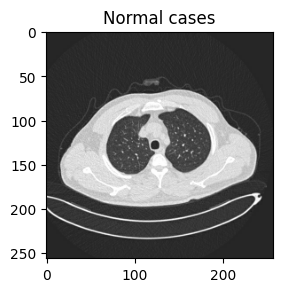

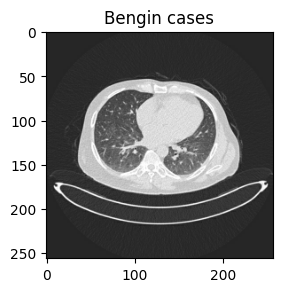

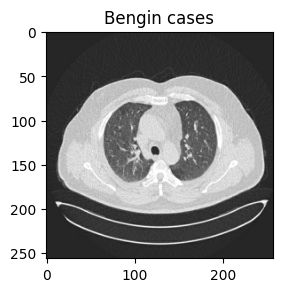

In [ ]:
for i in range(len(predikcije1)):
  if predikcije1[i]!=t_labels[i]:
    print(i)
    print("Predikcija: ", classes[predikcije1[i]], "Stvarna vrijednost: ", classes[t_labels[i]])
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(3,3,3)
    j=i//32
    k=i-32*j
    print("j:",j,k)
    plt.imshow(slike[j][k].numpy().astype("uint8"))
    label = t_labels[i]
    plt.title(classes[label])

Ovog puta smo dobili test accuracy od 99.16%. Model je pogriješio u predikciji 4 slike, pri čemu je zamijenio normalne i benigne slučajeve. Iznad vidimo slike koje su pogrešno klasificirane. Očigledno, prethodni model je bolji, pošto on griješi u samo jednoj slici.

Razlog tome može biti što smo stavili prevelik zoom (range 20%), obzirom na to da su mnoge slike iz dataseta već augmetovane na početku i već su približene. (I tad je range bio 20%)


---
Do sada smo koristili konvolucijske slojeve VGG16 mreže kakvi jesu. Sada ćemo raditi fine-tuning posljednjeg sloja tj. posljednja 3 konvolucijska sloja. Ovo bi trebalo da poboljša tačnost modela, jer u ovom slučaju posljednje slojeve "prilagođavamo" našim slikama tj CT snimcima. Inače, ova mreža je trenirana na ImageNet datasetu.

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
 layer.trainable = False

Možemo koristiti fine-tuning konvolucijskog sloja samo za drugi model - kada u svakoj epohi slike prolaze kroz cijeli konvolucijski sloj uz data augmentaciju. Ne možemo u prvom modelu, jer tu praktički i ne treniramo kovolucijski sloj.

Ovog puta ćemo staviti zoom na 0.1 i primijeniti ostalo.

In [ ]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomZoom(0.1),
 ]
)
inputs = keras.Input(shape=(256,256, 3))
x = data_augmentation(inputs)
x = keras.layers.Lambda(
     lambda x: keras.applications.vgg16.preprocess_input(x))(x) #nije moglo bez Lambda layera jer se onako nije moglo "serialize"
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy",
 optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
 metrics=["accuracy"])

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="model_sa_vgg16_i_fine_tuning.keras",
 save_best_only=True,
 monitor="val_loss")
]
history = model.fit(
 train_dataset,
 epochs=25,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/25
121/121 [==============================] - 30s 209ms/step - loss: 1.1280 - accuracy: 0.9212 - val_loss: 0.2854 - val_accuracy: 0.9697
Epoch 2/25
121/121 [==============================] - 26s 207ms/step - loss: 0.2878 - accuracy: 0.9646 - val_loss: 0.1079 - val_accuracy: 0.9767
Epoch 3/25
121/121 [==============================] - 26s 205ms/step - loss: 0.1383 - accuracy: 0.9752 - val_loss: 0.0696 - val_accuracy: 0.9837
Epoch 4/25
121/121 [==============================] - 26s 202ms/step - loss: 0.0854 - accuracy: 0.9814 - val_loss: 0.1314 - val_accuracy: 0.9790
Epoch 5/25
121/121 [==============================] - 28s 218ms/step - loss: 0.0796 - accuracy: 0.9840 - val_loss: 0.0527 - val_accuracy: 0.9883
Epoch 6/25
121/121 [==============================] - 27s 213ms/step - loss: 0.0538 - accuracy: 0.9879 - val_loss: 0.0363 - val_accuracy: 0.9930
Epoch 7/25
121/121 [==============================] - 26s 205ms/step - loss: 0.0435 - accuracy: 0.9902 - val_loss: 0.1006 - val_ac

In [ ]:
model = keras.models.load_model("model_sa_vgg16_i_fine_tuning.keras", safe_mode=False)
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

15/15 [==============================] - 4s 148ms/step - loss: 8.3898e-04 - accuracy: 1.0000
Test accuracy: 1.000


In [ ]:

matrica=[]
t_labels=[]
for file, labels in test_dataset:
  result=model.predict(file)
  matrica.append(result)
  t_labels.append(labels.numpy())

t_labels=np.concatenate(t_labels, axis=None)

matrica1=np.concatenate(matrica, axis=0)
predikcije1=[] #predikcije

for i in range(len(matrica1)):
  j=pd.Series(matrica1[i]).idxmax()
  predikcije1.append(j)

1/1 [==============================] - 0s 159ms/step


[[170   0   0]
 [  0 151   0]
 [  0   0 158]]


1.0

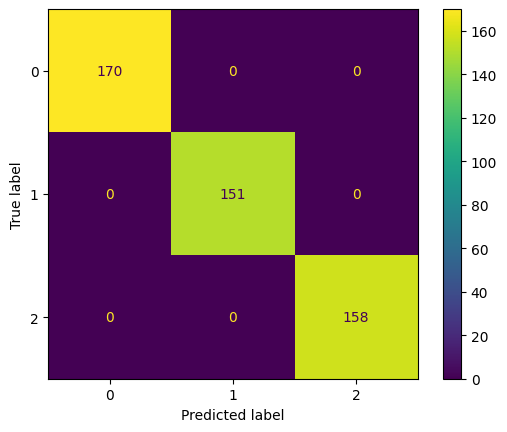

In [ ]:
cm = confusion_matrix(t_labels,predikcije1)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()
accuracy_score(t_labels, predikcije1)

Uspjeli smo postići accuracy od 100% na test skupu. U poređenju sa ostalim modelima koje smo kreirali, ovaj definitivno daje najbolje rezultate na test skupu. Sljedeći je model sa VGG16 mrežom koji ne radi data augmentaciju i ne trenira konvolucijski sloj već sprema feature-e i trenira samo dense slojeve na vrhu. On griješi u klasifikaciji jedne slike. Treći po redu je model 2 tj model sa 5 konvolucijskih slojeva, flatten i output slojem, koji griješi u samo 3 slike. On ima dosta jednostavniju arhitekturu nego prethodna dva, a postiže iznimno dobre rezultate.

---
Važno je još primijetiti da nijedan od ova 3 modela ne predviđa za maligni slučaj da je benigan - što bi bilo najopasnije. Obično mijenja normalne za benigne, te u slučaju modela 2 za jedan benigni tvrdi da je maligni. Pošto bi ovakav program bio korišten kao pomoćno sredstvo doktora za predikciju postojanja tumora na osnovu ct snimaka i klasifikaciju istih, a ne definitivna dijagnoza, to znači da bi u ovom slučaju pacijent bio podvrgnut dodatnim pretragama koje bi utvrdile da je ipak riječ o benignom tumoru.
